<a href="https://colab.research.google.com/github/blechschmidtlaura/datenanalyseCorona/blob/master/datenanalyseCorona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install yfinance
!pip install colab-gitlab
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta

In [95]:
yf.pdr_override() # <== that's all it takes :-)

dax_ticker = "^GDAXI"
start_date = "2020-01-22"

# download dataframe using pandas_datareader
data = pdr.get_data_yahoo(dax_ticker, start=start_date)

[*********************100%***********************]  1 of 1 completed


In [96]:
print(data.head())

                    Open          High  ...     Adj Close     Volume
Date                                    ...                         
2020-01-22  13601.650391  13640.059570  ...  13515.750000   73130700
2020-01-23  13455.900391  13486.139648  ...  13388.419922   90749900
2020-01-24  13512.839844  13604.849609  ...  13576.679688   87986400
2020-01-27  13374.990234  13399.419922  ...  13204.769531  101409200
2020-01-28  13274.009766  13327.120117  ...  13323.690430   91825300

[5 rows x 6 columns]


In [97]:
for row in data.values[:10]:
  print(row[0])

13601.650390625
13455.900390625
13512.83984375
13374.990234375
13274.009765625
13316.419921875
13186.490234375
13196.7998046875
13033.169921875
13135.6103515625


['01/22/20', '01/23/20', '01/24/20', '01/27/20', '01/28/20', '01/29/20', '01/30/20', '01/31/20', '02/03/20', '02/04/20', '02/05/20', '02/06/20', '02/07/20', '02/10/20', '02/11/20', '02/12/20', '02/13/20', '02/14/20', '02/17/20', '02/18/20', '02/19/20', '02/20/20', '02/21/20', '02/24/20', '02/25/20', '02/26/20', '02/27/20', '02/28/20', '03/02/20', '03/03/20', '03/04/20', '03/05/20', '03/06/20', '03/09/20', '03/10/20', '03/11/20', '03/12/20', '03/13/20', '03/16/20', '03/17/20', '03/18/20', '03/19/20', '03/20/20', '03/23/20', '03/24/20', '03/25/20', '03/26/20', '03/27/20', '03/30/20', '03/31/20', '04/01/20', '04/02/20', '04/03/20', '04/06/20', '04/07/20', '04/08/20', '04/09/20', '04/14/20', '04/15/20', '04/16/20', '04/17/20', '04/20/20', '04/21/20', '04/22/20', '04/23/20', '04/24/20', '04/27/20', '04/28/20']


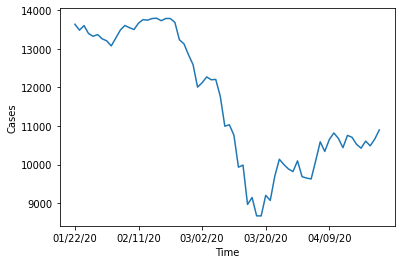

In [98]:
from datetime import datetime
x = list(map(lambda date: datetime.strftime(date, "%m/%d/%y"), data.index))

"""
x = []

for date in data.index:
  x.append(datetime.strftime(date, "%m/%d/%y"))

"""


print(x)
y = []

for row in data.values:
  y.append(row[1])

plt.xlabel('Time')
plt.ylabel('Cases')
plt.xticks(list(range(0, len(x), 14)))

plt.plot(x, y)


plt.show()

In [0]:

corona_data = pd.read_csv(r"global_cases_corona.csv")


In [0]:
# TODO ändern wenn Oktober ist !!
x2 = list(map(lambda date: "0" + date, list(corona_data.columns)[4:]))
#:x2.pop(0)
y2 = []
      

for row in corona_data.values:
    if row[1] == "Germany":
      y2.extend(row)
y2 = y2[4:]

In [0]:
# TODO ändern wenn Oktober ist !!
x3 = list(map(lambda date: "0" + date, list(corona_data.columns)[4:]))
#:x2.pop(0)
y3 = []
      

for row in corona_data.values:
    if row[0] == "Hubei":
      y3.extend(row)
y3 = y3[4:]

In [102]:
unvollstaendige_liste = x[:]
x2_copy = x2[:]

"""
for i in range(len(x2_copy)):
  x_element =  unvollstaendige_liste[i]
  x2_element = x2_copy[i]
  if x_element != x2_element:
      unvollstaendige_liste.insert(i, x2_element)
      y.insert(i, y[i-1]) 
"""



'\nfor i in range(len(x2_copy)):\n  x_element =  unvollstaendige_liste[i]\n  x2_element = x2_copy[i]\n  if x_element != x2_element:\n      unvollstaendige_liste.insert(i, x2_element)\n      y.insert(i, y[i-1]) \n      # handy aus, telefon? kannst mich auf dem Festnetz anrufen\n'

In [103]:
current_date = datetime.strptime(x[0], "%m/%d/%y")
one_day = timedelta(days=1)
current_date -= one_day
dates = []
for i in range(len(x2)):
    current_date += one_day
    str_date = datetime.strftime(current_date, "%m/%d/%y")
    dates.append(str_date)

for i in range(len(dates)):
  if datetime.strptime(unvollstaendige_liste[i], "%m/%d/%y") != datetime.strptime(dates[i], "%m/%d/%y"):
      part_until_i = unvollstaendige_liste[:i]
      part_after_i = unvollstaendige_liste[i:]
      part_until_i.append(dates[i])
      unvollstaendige_liste = part_until_i
      unvollstaendige_liste.extend(part_after_i)
      y.insert(i, y[i-1])
unvollstaendige_liste.pop(len(unvollstaendige_liste)-1)
y.pop(len(y)-1)

10897.8203125

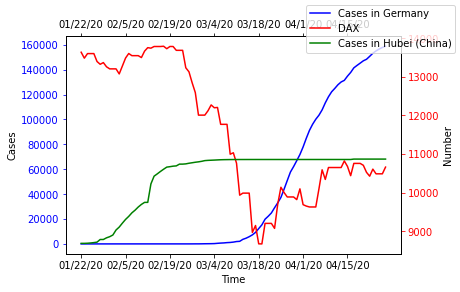

In [104]:
fig, axis1 = plt.subplots()
axis1.set_xlabel('Time')
axis1.set_ylabel('Cases')
#axis1.set_xticks(list(range(0, len(x2), 14)))
axis1.tick_params(axis='y', color='blue')
axis2 = axis1.twinx()
#axis3 = axis2.twinx()
axis3 = axis1.twiny()

axis1.plot(x2,y2, color='blue', label="Cases in Germany")
axis2.set_ylabel('Number')

axis1.tick_params(axis='y', colors='blue')
axis2.tick_params(axis='y', colors='red')

axis3.plot(x2, y3, color='green', label="Cases in Hubei (China)")
axis3.set_xticks(list(range(0, len(x2), 14)))

axis2.plot(x2, y, color='red', label="DAX")
axis1.set_xticks(list(range(0, len(x2), 14)))
axis2.set_xticks(list(range(0, len(x2), 14)))

fig.legend()
#fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.show()
fig.savefig("WirtschaftUndCoronaChina.png")